In [1]:
from collections import defaultdict
import os
import numpy as np
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt
from joblib import Parallel, delayed
from IPython.display import Image, display

from src.graph_extraction import parse_ud_conllu
from src.dist_plot import dist_plot_render_one, model_fit_render_one, model_fit_render_dataset
from src.distributions import *
from src.utils import LANG_DICT, print_fitted_params, print_aic_deltas, load_degree_distribution

np.random.seed(42)

print("test")

DEG_SEQ_FOLDER = "./data/degree_sequences"

test


In [2]:
for lang in LANG_DICT.keys():     

    os.makedirs(DEG_SEQ_FOLDER, exist_ok=True)
    with open(
        f"{DEG_SEQ_FOLDER}/{LANG_DICT[lang]}_degree_sequence.txt",
        "w",
        encoding="utf-8",
    ) as f:
        nodes, edges = parse_ud_conllu(lang=lang)
        G = nx.DiGraph()
        G.add_nodes_from(nodes)
        G.add_edges_from(edges)

        out_degrees = [d for n, d in G.out_degree()]
        for degree in out_degrees:
            f.write(f"{degree}\n")
    print(f"Saved degree sequence for {LANG_DICT[lang]}")

Saved degree sequence for english
Saved degree sequence for arabic
Saved degree sequence for czech
Saved degree sequence for german
Saved degree sequence for spanish
Saved degree sequence for finnish
Saved degree sequence for french
Saved degree sequence for galician
Saved degree sequence for hindi
Saved degree sequence for indonesian
Saved degree sequence for icelandic
Saved degree sequence for italian
Saved degree sequence for japanese
Saved degree sequence for korean
Saved degree sequence for polish
Saved degree sequence for portuguese
Saved degree sequence for russian
Saved degree sequence for swedish
Saved degree sequence for thai
Saved degree sequence for turkish
Saved degree sequence for chinese


In [3]:
def language_stats(language):
    return pd.Series(
        {
            "N": len(language),
            "Maximum degree": max(language),
            "M/N": sum(language) / len(language),
            "N/M": len(language) / sum(language),
        }
    )

stats_list = []
for lang in LANG_DICT.keys():
    degrees = load_degree_sequence(f"{DEG_SEQ_FOLDER}", lang)

    stats = language_stats(degrees)
    stats.name = LANG_DICT[lang]
    stats_list.append(stats)

language_dataset = pd.DataFrame(stats_list)
language_dataset.index.name = "Language"

output_path = "./data/language_stats.csv"
language_dataset.to_csv(output_path)

print(language_dataset)

                 N  Maximum degree       M/N       N/M
Language                                              
english     4161.0            99.0  4.310262  0.232004
arabic      4832.0           109.0  3.588162  0.278694
czech       5069.0            66.0  3.228645  0.309727
german      4905.0            63.0  3.808359  0.262580
spanish     4817.0            57.0  3.990866  0.250572
finnish     4633.0            55.0  3.000000  0.333333
french      4725.0            85.0  4.295450  0.232804
galician    4805.0            57.0  3.966077  0.252138
hindi       3653.0           453.0  4.859841  0.205768
indonesian  3578.0           159.0  4.473728  0.223527
icelandic   4802.0            83.0  3.374219  0.296365
italian     4767.0            63.0  4.135095  0.241832
japanese    3816.0           156.0  5.433438  0.184046
korean      5299.0           155.0  2.683525  0.372644
polish      5291.0           104.0  3.023247  0.330770
portuguese  4775.0            57.0  3.997068  0.250183
russian   

In [4]:
tasks = [(lang, perspective) for perspective in ("Counts", "Probabilities") for lang in LANG_DICT.keys()]
paths = Parallel(n_jobs=4, prefer="processes")(
    delayed(dist_plot_render_one)(lang, perspective, DEG_SEQ_FOLDER, "./data/degree_plots") for (lang, perspective) in tasks
)
for p in paths:
    print("Saved:", p)

Saved: ./data/degree_plots\english_Counts.png
Saved: ./data/degree_plots\arabic_Counts.png
Saved: ./data/degree_plots\czech_Counts.png
Saved: ./data/degree_plots\german_Counts.png
Saved: ./data/degree_plots\spanish_Counts.png
Saved: ./data/degree_plots\finnish_Counts.png
Saved: ./data/degree_plots\french_Counts.png
Saved: ./data/degree_plots\galician_Counts.png
Saved: ./data/degree_plots\hindi_Counts.png
Saved: ./data/degree_plots\indonesian_Counts.png
Saved: ./data/degree_plots\icelandic_Counts.png
Saved: ./data/degree_plots\italian_Counts.png
Saved: ./data/degree_plots\japanese_Counts.png
Saved: ./data/degree_plots\korean_Counts.png
Saved: ./data/degree_plots\polish_Counts.png
Saved: ./data/degree_plots\portuguese_Counts.png
Saved: ./data/degree_plots\russian_Counts.png
Saved: ./data/degree_plots\swedish_Counts.png
Saved: ./data/degree_plots\thai_Counts.png
Saved: ./data/degree_plots\turkish_Counts.png
Saved: ./data/degree_plots\chinese_Counts.png
Saved: ./data/degree_plots\english_P

In [5]:
print(LANG_DICT.keys())

dict_keys(['en', 'ar', 'cs', 'de', 'es', 'fi', 'fr', 'gl', 'hi', 'id', 'is', 'it', 'ja', 'ko', 'pl', 'pt', 'ru', 'sv', 'th', 'tr', 'zh'])


Insert any of the keys to display the plot:

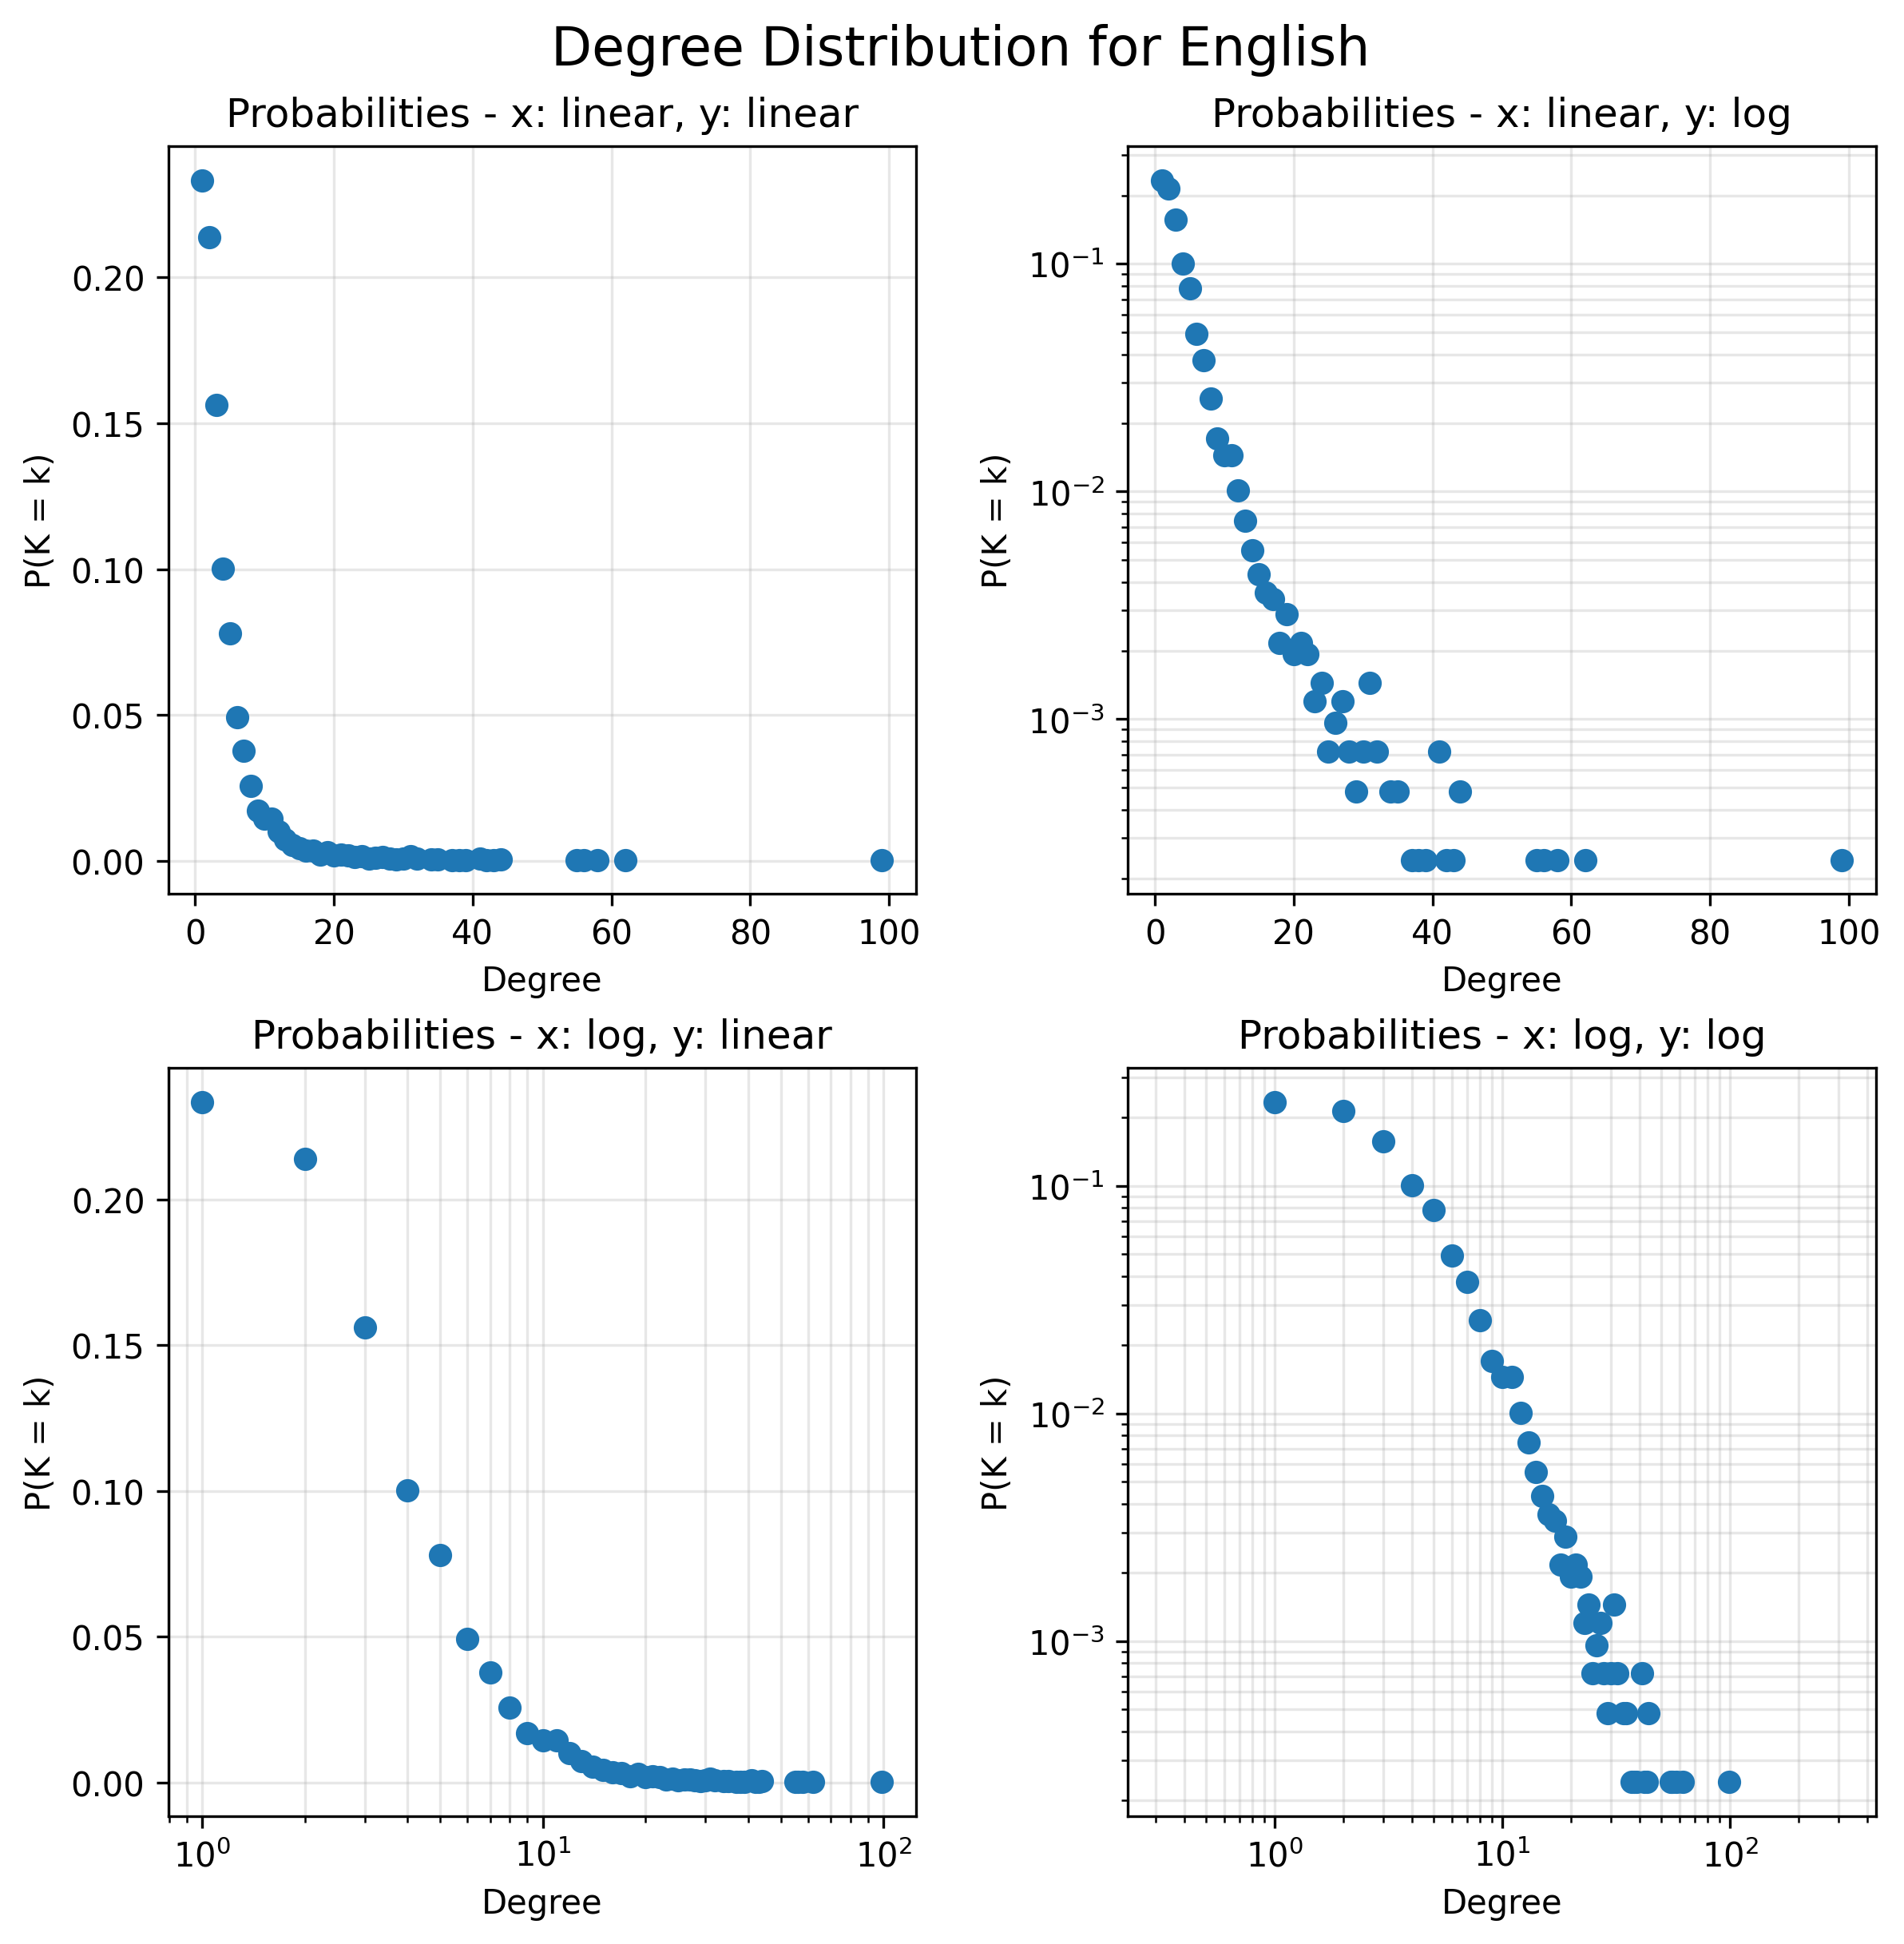

In [6]:
LANG_KEY = "en"
PERSPECTIVE = "p" # choose from "p": Probabilities or "c": Counts


perspective = "Probabilities" if PERSPECTIVE == "p" else "Counts"
display(
    Image(
        filename=f"./data/degree_plots/{LANG_DICT[LANG_KEY]}_{perspective}.png",
        width=600,
    )
)

In [7]:
models = [
    DisplacedPoisson,
    DisplacedGeometric,
    ZetaFixedGammaTwo,
    ZetaDistribution,
    ZetaRightTruncated,
]
def fit_models(models):
    fitted_models = defaultdict(str)
    for lang in LANG_DICT.keys():
        fitted_models[lang] = {}
        degrees = load_degree_sequence(base_path="./data/degree_sequences", lang=lang)

        for i, model in enumerate(models):
            cur_model = model()
            cur_model.fit(degrees)
            fitted_models[lang][i + 1] = cur_model
    return fitted_models

fitted_models = fit_models(models)

In [8]:
out_str_params = print_fitted_params(fitted_models)

                                        Model 
               __________________________________________________
                        1         2         4                   5
_________________________________________________________________
Language                                                         

en                 4.2487    0.2320    1.6445    1.5031   99.0000
ar                 3.4773    0.2787    1.7190    1.6180  109.0000
cs                 3.0803    0.3097    1.7458    1.6122   66.0000
de                 3.7157    0.2626    1.6802    1.5084   63.0000
es                 3.9110    0.2506    1.6442    1.4360   57.0000
fi                 2.8214    0.3333    1.8232    1.7023   55.0000
fr                 4.2331    0.2328    1.6236    1.4543   85.0000
gl                 3.8845    0.2521    1.6452    1.4376   57.0000
hi                 4.8207    0.2058    1.6854    1.6412  453.0000
id                 4.4199    0.2235    1.6622    1.5658  159.0000
is                 3.2424   

In [9]:
out_str_aic = print_aic_deltas(fitted_models)

                                        Model
               __________________________________________________
                        1         2         3         4         5
_________________________________________________________________
Language               Δ1        Δ2        Δ3        Δ4        Δ5
en                7968.23      0.00   2635.42   1770.49   1342.76
ar                7220.71      0.00   2190.46   1651.71   1361.15
cs                3828.13      0.00   2622.89   2183.81   1780.14
de                6367.67      0.00   3000.95   2234.67   1643.80
es                5250.22      0.00   3913.83   2909.77   2131.46
fi                4604.88      0.00   1066.25    898.45    611.16
fr                6703.34      0.00   3962.29   2809.20   2184.11
gl                5173.62      0.00   3930.71   2936.68   2164.71
hi               24386.14    579.94    633.15     87.24      0.00
id               10663.14      0.00   1406.39    759.53    533.69
is                6902.89     

In [10]:
if AltmannDistribution not in models:
    models.append(AltmannDistribution)
fitted_models_altmann = fit_models(models)

In [11]:
out_str_params_altmann = print_fitted_params(fitted_models_altmann)

                                                  Model 
               ______________________________________________________________________
                        1         2         4                   5                   6
_____________________________________________________________________________________
Language                                                                             

en                 4.2487    0.2320    1.6445    1.5031   99.0000    0.3615    0.1957
ar                 3.4773    0.2787    1.7190    1.6180  109.0000    0.4278    0.2319
cs                 3.0803    0.3097    1.7458    1.6122   66.0000    0.0965    0.3464
de                 3.7157    0.2626    1.6802    1.5084   63.0000    0.2068    0.2602
es                 3.9110    0.2506    1.6442    1.4360   57.0000    0.0000    0.2884
fi                 2.8214    0.3333    1.8232    1.7023   55.0000    0.6912    0.2302
fr                 4.2331    0.2328    1.6236    1.4543   85.0000    0.0000    0.2

In [12]:
out_str_aic_altmann = print_aic_deltas(fitted_models_altmann)

                                             Model
               ____________________________________________________________
                        1         2         3         4         5         6
___________________________________________________________________________
Language               Δ1        Δ2        Δ3        Δ4        Δ5        Δ6
en                8046.21     77.98   2713.41   1848.48   1420.74      0.00
ar                7324.01    103.30   2293.76   1755.02   1464.45      0.00
cs                3830.43      2.31   2625.20   2186.11   1782.45      0.00
de                6390.64     22.97   3023.92   2257.64   1666.77      0.00
es                5250.22      0.00   3913.83   2909.77   2131.46      2.00
fi                4823.37    218.49   1284.74   1116.93    829.64      0.00
fr                6703.34      0.00   3962.29   2809.20   2184.11      2.00
gl                5173.62      0.00   3930.71   2936.68   2164.71      2.00
hi               24914.75   1108.56  

In [13]:
paths = Parallel(n_jobs=4, prefer="processes")(
    delayed(model_fit_render_one)(
        lang, fitted_models_altmann[lang], DEG_SEQ_FOLDER, "./data/model_plots"
    )
    for lang in list(LANG_DICT.keys())
)
for p in paths:
    print("Saved:", p)

Saved: ./data/model_plots\english_model_fit.png
Saved: ./data/model_plots\arabic_model_fit.png
Saved: ./data/model_plots\czech_model_fit.png
Saved: ./data/model_plots\german_model_fit.png
Saved: ./data/model_plots\spanish_model_fit.png
Saved: ./data/model_plots\finnish_model_fit.png
Saved: ./data/model_plots\french_model_fit.png
Saved: ./data/model_plots\galician_model_fit.png
Saved: ./data/model_plots\hindi_model_fit.png
Saved: ./data/model_plots\indonesian_model_fit.png
Saved: ./data/model_plots\icelandic_model_fit.png
Saved: ./data/model_plots\italian_model_fit.png
Saved: ./data/model_plots\japanese_model_fit.png
Saved: ./data/model_plots\korean_model_fit.png
Saved: ./data/model_plots\polish_model_fit.png
Saved: ./data/model_plots\portuguese_model_fit.png
Saved: ./data/model_plots\russian_model_fit.png
Saved: ./data/model_plots\swedish_model_fit.png
Saved: ./data/model_plots\thai_model_fit.png
Saved: ./data/model_plots\turkish_model_fit.png
Saved: ./data/model_plots\chinese_model_fi

In [14]:
print(LANG_DICT.keys())

dict_keys(['en', 'ar', 'cs', 'de', 'es', 'fi', 'fr', 'gl', 'hi', 'id', 'is', 'it', 'ja', 'ko', 'pl', 'pt', 'ru', 'sv', 'th', 'tr', 'zh'])


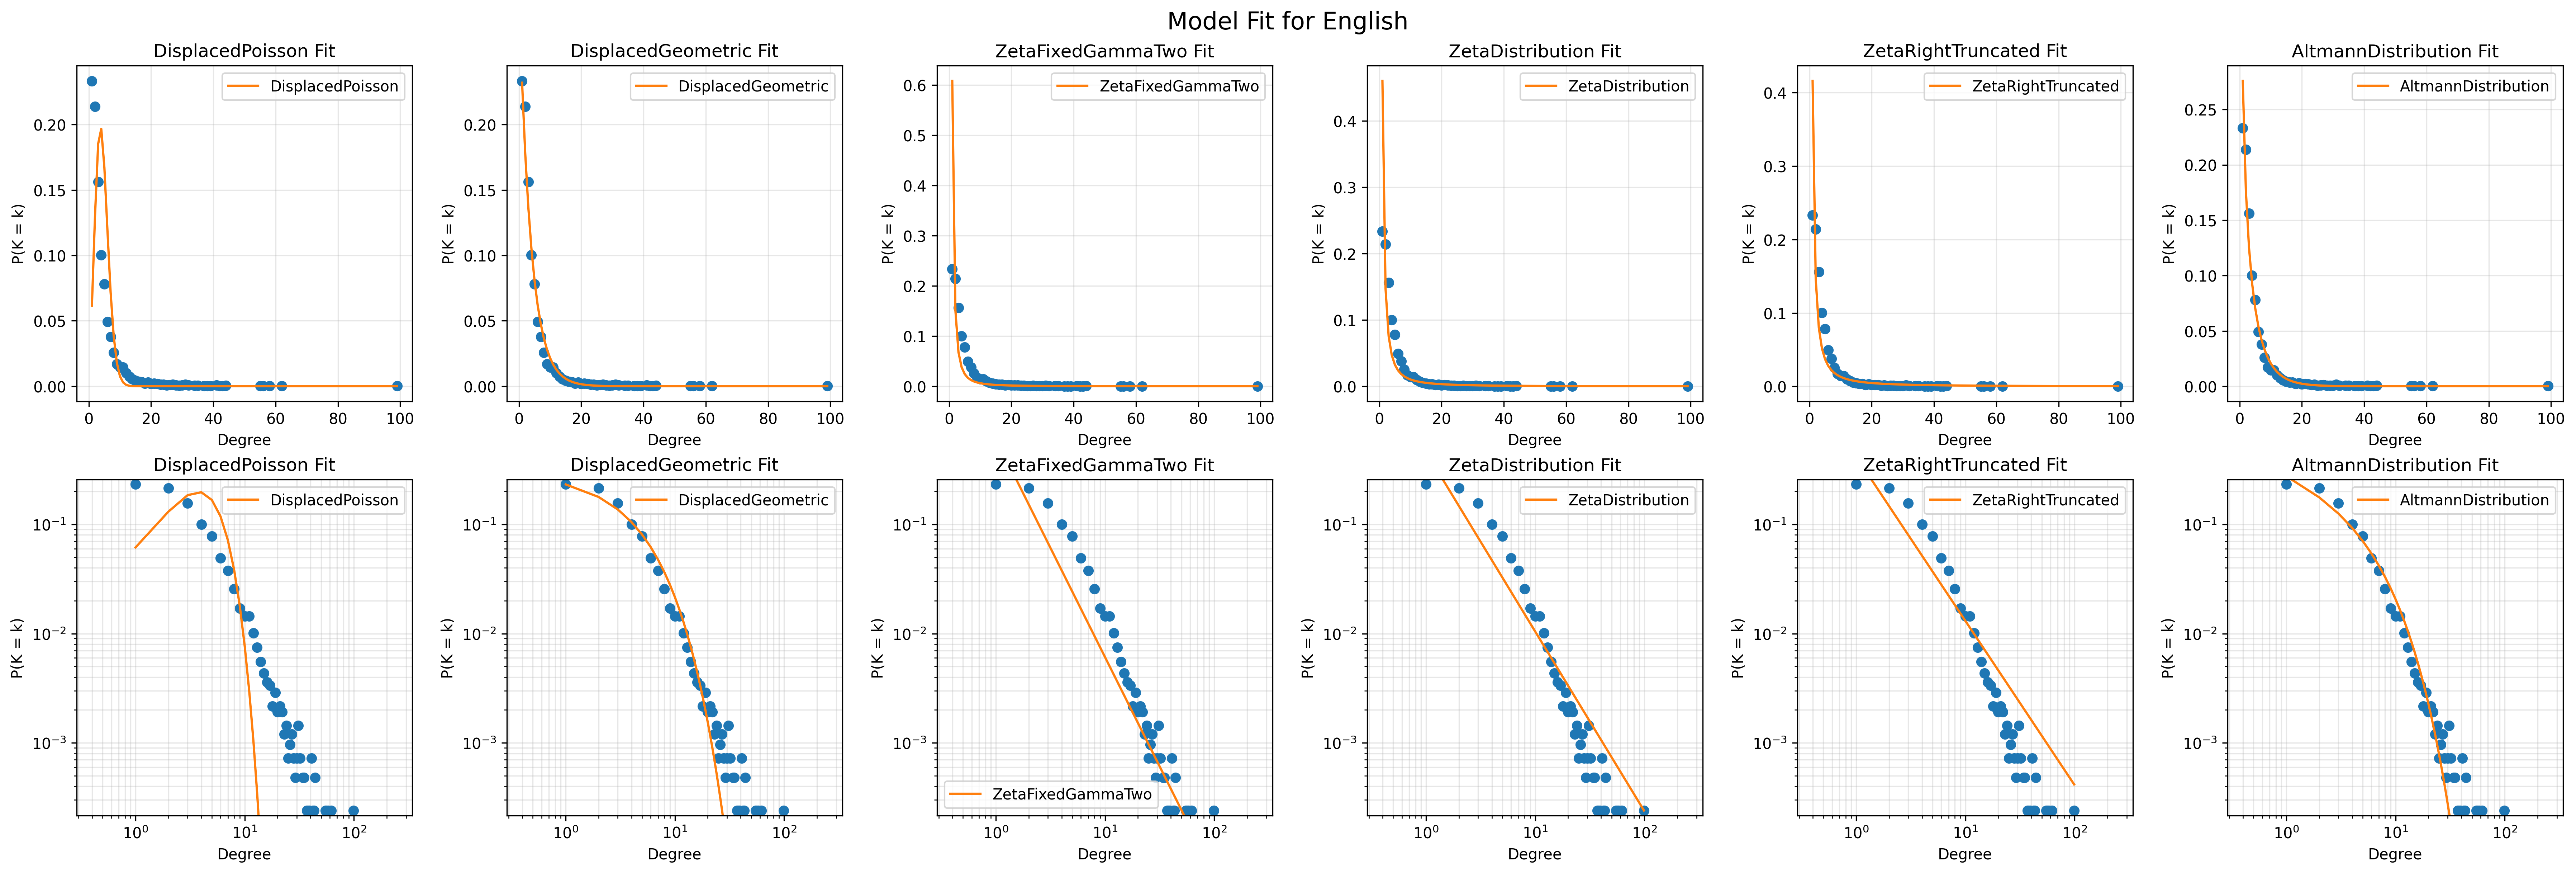

In [15]:
LANG_KEY = "en"

display(Image(filename=f"./data/model_plots/{LANG_DICT[LANG_KEY]}_model_fit.png"))

In [16]:
models = [
    DisplacedPoisson,
    DisplacedGeometric,
    ZetaFixedGammaTwo,
    ZetaDistribution,
    ZetaRightTruncated,
    AltmannDistribution,
]

params = defaultdict(str)
params["geometric"] = ["0.05", "0.1", "0.2", "0.4", "0.8"]
params["zeta"] = ["1.5", "2", "2.5", "3", "3.5"]


def fit_models(models):
    fitted_models = defaultdict(str)
    for dist in params.keys():
        for p in params[dist]:
            fitted_models[f"{dist}_{p}"] = {}
            degrees = load_degree_sequence(fixed_path=f"./data/samples_from_discrete_distributions/sample_of_{dist}_with_parameter_{p}.txt")

            for i, model in enumerate(models):
                cur_model = model()
                cur_model.fit(degrees)
                fitted_models[f"{dist}_{p}"][i + 1] = cur_model
    return fitted_models


fitted_models_sample_dists = fit_models(models)
out_str_params_sample_dists = print_fitted_params(fitted_models_sample_dists, y_header="Distribution")


                                                  Model 
               ______________________________________________________________________
                        1         2         4                   5                   6
_____________________________________________________________________________________
Distribution                                                                         

geometric_0.05    19.2420    0.0520    1.3325    0.8700  133.0000    0.0000    0.0534
geometric_0.1     10.2976    0.0971    1.4195    1.0628   95.0000    0.0521    0.0976
geometric_0.2      4.9836    0.1993    1.5716    1.2004   36.0000    0.0000    0.2222
geometric_0.4      2.2133    0.4024    1.8914    1.5447   14.0000    0.0000    0.5149
geometric_0.8      0.4918    0.7899    2.9991    2.7698    5.0000    0.3769    1.3477
zeta_1.5       21385.1729    0.0000    1.4955    1.494720070737.0000    1.4242    0.0000
zeta_2             5.0443    0.1970    1.9803    1.9663  362.0000    1.9745    

In [17]:
out_str_aic_sample_dists = print_aic_deltas(
    fitted_models_sample_dists, y_header="Distribution"
)

                                             Model
               ____________________________________________________________
                        1         2         3         4         5         6
___________________________________________________________________________
Distribution           Δ1        Δ2        Δ3        Δ4        Δ5        Δ6
geometric_0.05   11537.52      0.00   3082.14   1334.45    474.32      2.01
geometric_0.1     5180.88      0.00   1939.30    957.30    457.64      1.28
geometric_0.2     1376.43      0.00   1040.70    686.56    324.52      2.01
geometric_0.4      254.85      0.00    359.49    349.16    159.55      2.01
geometric_0.8       16.16      0.00    351.58     56.20     23.99      1.33
zeta_1.5       281022053.53  15517.69    658.28     62.54     64.18      0.00
zeta_2           16110.45   1693.92      0.31      1.96      0.00      2.54
zeta_2.5          1482.82    410.15    101.32      1.28      0.00      1.61
zeta_3             569.09    224.06

In [18]:
if "zeta_1.5" in fitted_models_sample_dists:
    del fitted_models_sample_dists["zeta_1.5"]  # takes ages to compute

paths = Parallel(n_jobs=4, prefer="processes")(
    delayed(model_fit_render_dataset)(
        ds_id,
        fitted_models_sample_dists[ds_id],
        "./data/samples_from_discrete_distributions",
        "./data/model_plots_sample_dists",
    )
    for ds_id in sorted(fitted_models_sample_dists.keys())
)
for p in paths:
    print("Saved:", p)

Saved: ./data/model_plots_sample_dists\geometric_0.05_model_fit.png
Saved: ./data/model_plots_sample_dists\geometric_0.1_model_fit.png
Saved: ./data/model_plots_sample_dists\geometric_0.2_model_fit.png
Saved: ./data/model_plots_sample_dists\geometric_0.4_model_fit.png
Saved: ./data/model_plots_sample_dists\geometric_0.8_model_fit.png
Saved: ./data/model_plots_sample_dists\zeta_2_model_fit.png
Saved: ./data/model_plots_sample_dists\zeta_2.5_model_fit.png
Saved: ./data/model_plots_sample_dists\zeta_3_model_fit.png
Saved: ./data/model_plots_sample_dists\zeta_3.5_model_fit.png


In [19]:
fitted_models_sample_dists.keys()

dict_keys(['geometric_0.05', 'geometric_0.1', 'geometric_0.2', 'geometric_0.4', 'geometric_0.8', 'zeta_2', 'zeta_2.5', 'zeta_3', 'zeta_3.5'])

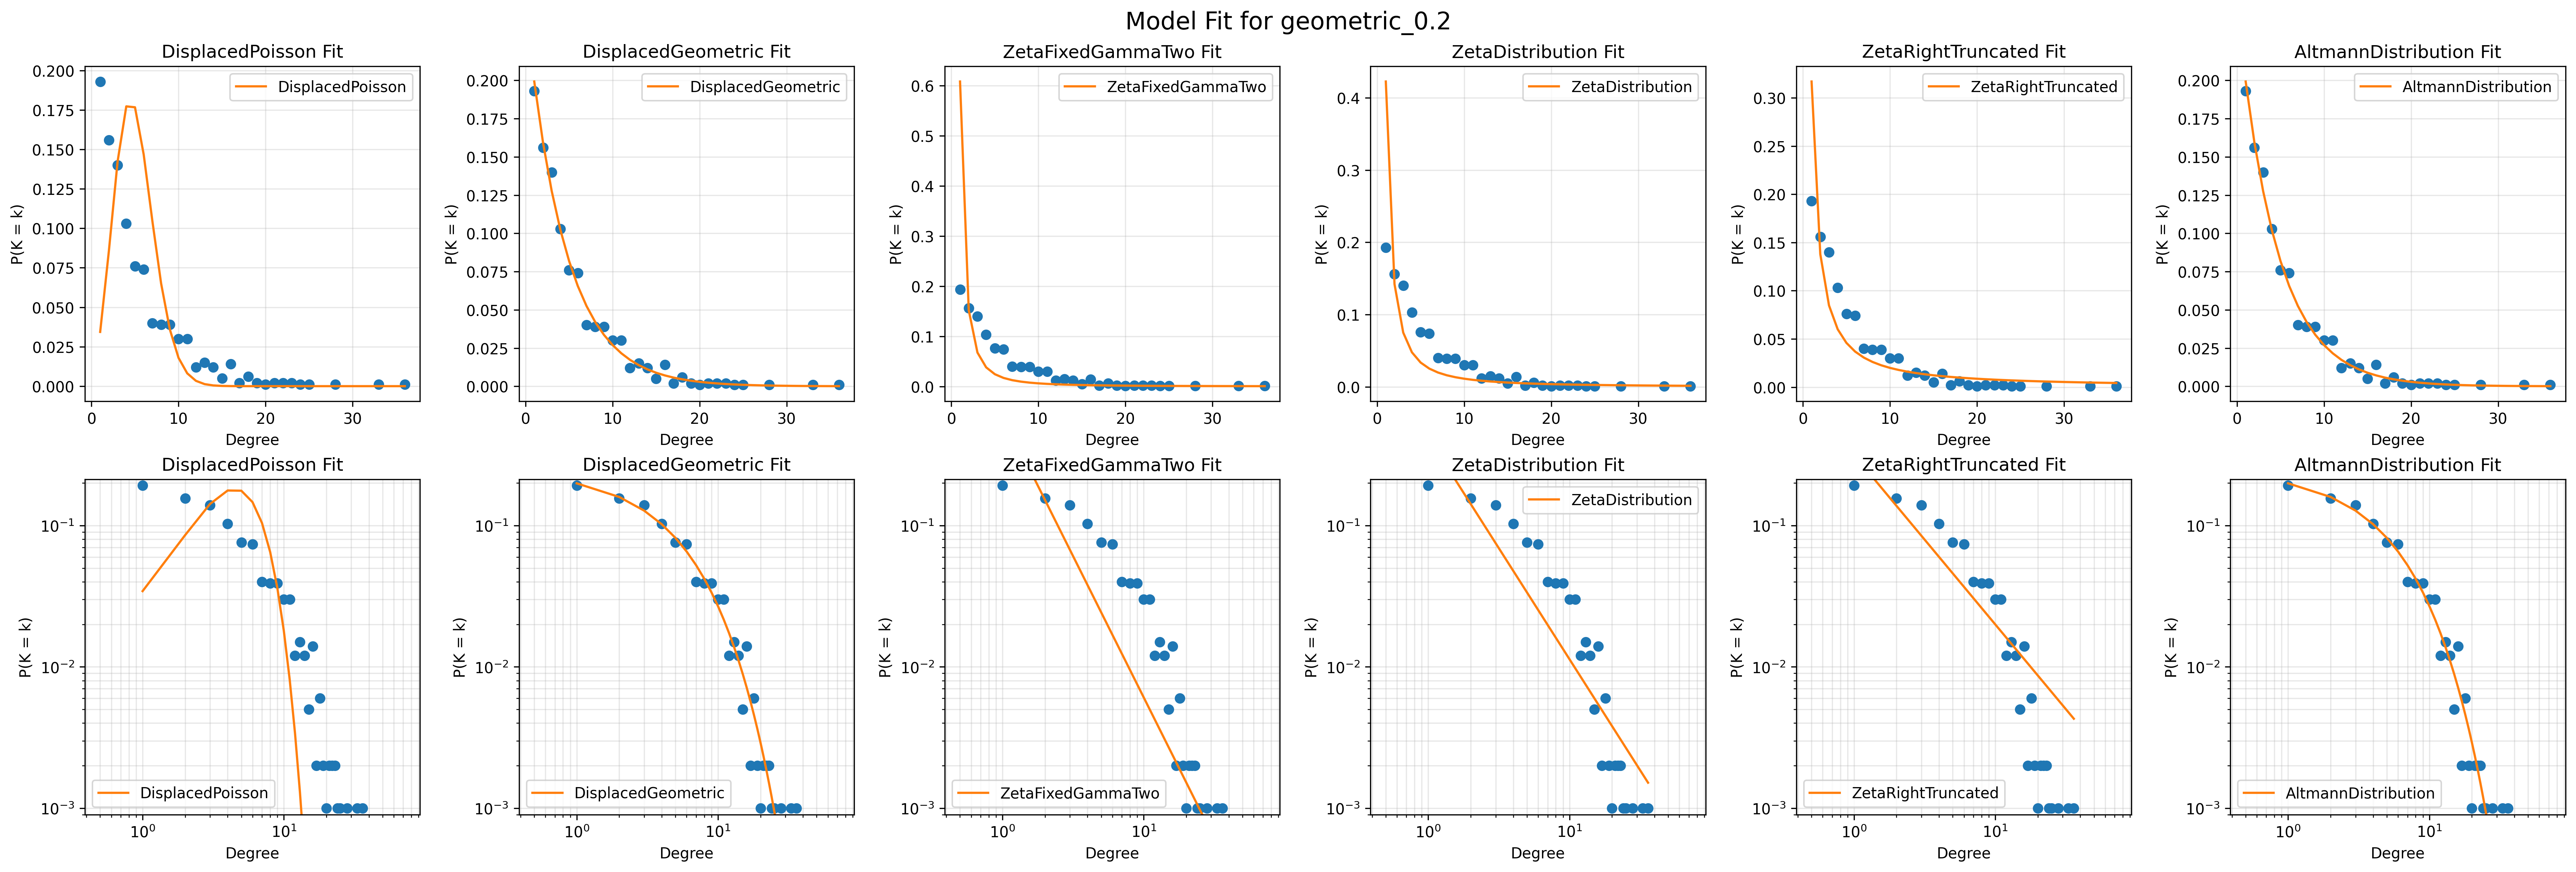

In [20]:
DIST_KEY = "geometric_0.2"

display(Image(filename=f"./data/model_plots_sample_dists/{DIST_KEY}_model_fit.png"))